In [151]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random

In [152]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [153]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

y_scaled = sy.fit_transform(df[['price']])
x_scaled = sx.fit_transform(df.drop(df[['price']], axis='columns'))

In [69]:
bias = 0
features_num = x_scaled.shape[1]
weights = np.ones(features_num)

y_predicted = np.dot(weights, x_scaled.T) + bias

cost = np.mean(np.square(y_predicted-y_scaled))
cost

0.5925113301117781

In [142]:
def Batch_GD(x, y_true, epochs, l_rate=0.01):
    features_num = x.shape[1]
    weights = np.ones(shape=(features_num))
    bias = 0
    n = x.shape[0]
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(weights, x.T) + bias
        
        w_grad = -(2/n)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/n)*np.sum(y_true-y_predicted)
        
        weights = weights - l_rate * w_grad
        bias = bias - l_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))
                
        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
        
    return weights, bias, cost_list, epochs_list

wt, bs, cost_ls, epochs_ls = Batch_GD(x_scaled, y_scaled.T[0], 500)

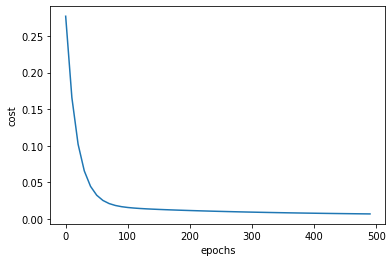

In [143]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epochs_ls, cost_ls)

In [147]:
x_scaled.shape[1]
x_scaled[random.randint(0,6)]
y_scaled.T[0]

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [166]:
def stoichasticGD(x, y_true, epochs, l_rate=0.01):
    feature_num = x.shape[1]
    weights = np.ones(feature_num)
    bias = 0 
    n = x.shape[0]
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        index = random.randint(0,n-1)
        new_x = x[index]
        y = y_true[index]
    
        y_predicted = np.dot(new_x.T, weights) + bias
        
        w_grad = -(2/n)*(new_x.T.dot(y-y_predicted))
        b_grad = -(2/n)*(y-y_predicted)
        
        weights = weights - l_rate*w_grad
        bias = bias - l_rate*b_grad
        
        cost = np.square(y-y_predicted)
        
        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
    return weights, bias, cost_list, epochs_list

wt, bs, cost_ls, epochs_ls = stoichasticGD(x_scaled, y_scaled.T[0], 3000)

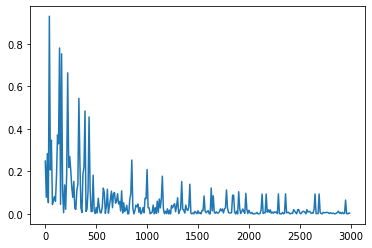

In [167]:
plt.plot(epochs_ls, cost_ls)
